<h2>Part A (Supervised learning): </h2>



In recent years, human activity recognition (HAR) has become a hot topic inside the scientific community, as more and more wearable devices enter the  market.  


We will use realistic-focused data (extracted directly from the Android app and the sensors of each smartphone involved) to predict user association with one of the four possible registered activities whether a user is inactive, active, walking, or driving, and perform association with defined movements, in addition to general information extraction. 


The data collected comes from four different independent sensors: accelerometer, gyroscope, magnetometer and GPS; all data is labelled as well.  One element that could be potentially problematic is having to join data from very high-frequency sensors such as the accelerometer, with a low-frequency sensor, such as the GPS unit.  
 

To evaluate these datasets, we will break each dataset into training and testing data, then combine the training sets and the testing sets to have our full set of data to for the model. 


We expect to leverage multiple supervised machine learning algorithms including SVM with different kernels, Random Forest, XGBOOST, as well as leveraging F1 scores for validation of various models. 
As this is a classification problem with multiple targets, we expect to output numerous  multi-class confusion matrices.

We expect to leverage multiple supervised machine learning algorithms including SVM with different kernels, Random Forest, XGBOOST, as well as leveraging F1 scores for validation of various models. 
As this is a classification problem with multiple targets, we expect to output numerous  multi-class confusion matrices.

<h2> Initialization

<h3>Imports

In [83]:
#!conda install -c conda-forge scitime -y
#!conda install -c conda-forge plotly -y
!pip install plotly

In [84]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 1000)
    
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
from matplotlib import offsetbox
import matplotlib.patheffects as PathEffects
%matplotlib inline
    
import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,14)})
# i can change this later

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
    
from scipy.stats import norm, skew, probplot
from scipy.optimize import curve_fit
    
import os
from time import time

from scitime import RuntimeEstimator
  
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#  from sklearn.utils import shuffle 

<h3>Global Variables

In [85]:
RANDOM_SEED = 42

<h2>Data Loading

In [86]:
acc_df = pd.read_csv('D:\Documents\Python\Michigan_Milestone_Initial_Work\ENTER\RAW DATASET I\sensoringData_acc.csv')
print(acc_df.shape)
acc_df.head()

(17378634, 8)


,id,username,timestamp,acc_x_axis,acc_y_axis,acc_z_axis,activity_id,activity
0,4006559,11,1.570534e+09,-0.388868,3.812294,6.222649,-499,Walking
1,4006561,11,1.570534e+09,-0.242817,3.838631,6.059839,-499,Walking
2,4006562,11,1.570534e+09,-0.259577,3.946373,6.023924,-499,Walking
3,4006563,11,1.570534e+09,-0.048881,3.807506,6.090964,-499,Walking
4,4006564,11,1.570534e+09,0.295895,3.795534,6.040684,-499,Walking


In [87]:
gps_df = pd.read_csv('D:\Documents\Python\Michigan_Milestone_Initial_Work\ENTER\RAW DATASET I\sensoringData_gps.csv')
print(gps_df.shape)
gps_df.head()

(19079, 11)


,id,username,timestamp,gps_lat_increment,gps_long_increment,gps_alt_increment,gps_speed,gps_bearing,gps_accuracy,activity_id,activity
0,4006559,11,1.570534e+09,0.000000,0.000000,0.000000,0.000000,0.000000,18.910999,-499,Walking
1,5370208,11,1.570541e+09,0.000139,0.000065,17.420244,0.866783,231.216095,32.000000,-497,Walking
2,5370386,11,1.570541e+09,0.000237,0.000032,6.851172,1.296028,237.170181,6.000000,-497,Walking
3,5371457,11,1.570541e+09,0.000068,0.000159,2.973977,1.477790,223.478317,6.000000,-497,Walking
4,5372511,11,1.570541e+09,0.000092,0.000127,0.859707,1.309624,223.673676,6.000000,-497,Walking


In [88]:
gyro_df = pd.read_csv('D:\Documents\Python\Michigan_Milestone_Initial_Work\ENTER\RAW DATASET I\sensoringData_gyro.csv')
print(gyro_df.shape)
gyro_df.head()

(3242321, 8)


,id,username,timestamp,gyro_x_axis,gyro_y_axis,gyro_z_axis,activity_id,activity
0,4006559,11,1.570534e+09,-0.339005,-0.016215,-0.066681,-499,Walking
1,4006573,11,1.570534e+09,-0.257149,0.072972,0.117189,-499,Walking
2,4006584,11,1.570534e+09,0.094710,-0.013771,0.052437,-499,Walking
3,4006602,11,1.570534e+09,0.545528,0.071750,0.296783,-499,Walking
4,4006622,11,1.570534e+09,0.036067,0.150551,0.119632,-499,Walking


In [89]:
magn_df = pd.read_csv('D:\Documents\Python\Michigan_Milestone_Initial_Work\ENTER\RAW DATASET I\sensoringData_magn.csv')
print(magn_df.shape)
magn_df.head()

(6465626, 8)


,id,username,timestamp,magn_x_axis,magn_y_axis,magn_z_axis,activity_id,activity
0,4006559,11,1.570534e+09,13.259999,2.28,-50.340000,-499,Walking
1,4006566,11,1.570534e+09,13.200000,2.40,-54.360001,-499,Walking
2,4006578,11,1.570534e+09,14.759999,2.04,-55.379997,-499,Walking
3,4006586,11,1.570534e+09,13.920000,1.56,-54.840000,-499,Walking
4,4006588,11,1.570534e+09,14.040000,1.74,-54.899998,-499,Walking


<h3>Load CSV into Dataframe

In [90]:
#Merge on id index
mergeon = ['id','username', 'timestamp', 'activity_id', 'activity']
df = acc_df.merge(gps_df,on=mergeon,how='outer',suffixes=('',''))
df = df.merge(gyro_df,on=mergeon,how='outer',suffixes=('',''))
df = df.merge(magn_df,on=mergeon,how='outer',suffixes=('',''))


<h3>Sample of Dataframe

In [91]:
print(df.shape)
df.sample(10)

(27105657, 20)


,id,username,timestamp,acc_x_axis,acc_y_axis,acc_z_axis,activity_id,activity,gps_lat_increment,gps_long_increment,gps_alt_increment,gps_speed,gps_bearing,gps_accuracy,gyro_x_axis,gyro_y_axis,gyro_z_axis,magn_x_axis,magn_y_axis,magn_z_axis
22719632,12335432,6,1.571604e+09,NaN,NaN,NaN,-493,Driving,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.390625,43.500000,-42.781250
14405737,32862372,4,1.576511e+09,0.020204,-0.037073,0.020967,68,Inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8440102,26623428,3,1.576232e+09,-0.004133,0.000882,0.154776,9,Inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7830108,26494608,7,1.576220e+09,0.194536,0.122761,-0.267095,64,Driving,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19741663,26027844,10,1.576166e+09,NaN,NaN,NaN,42,Inactive,NaN,NaN,NaN,NaN,NaN,NaN,-0.001411,0.001189,-0.000460,NaN,NaN,NaN
19098295,31359339,7,1.576498e+09,NaN,NaN,NaN,103,Inactive,NaN,NaN,NaN,NaN,NaN,NaN,-0.000126,0.000155,-0.000200,NaN,NaN,NaN
17801080,17940545,9,1.573848e+09,NaN,NaN,NaN,-460,Active,NaN,NaN,NaN,NaN,NaN,NaN,0.131028,0.140615,0.071373,NaN,NaN,NaN
24093676,37370629,7,1.576685e+09,NaN,NaN,NaN,133,Inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.758137,-31.444637,-30.614212
24910419,10909788,8,1.571336e+09,NaN,NaN,NaN,-496,Walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.311409,-12.179413,-22.521255
23809659,31309468,7,1.576490e+09,NaN,NaN,NaN,102,Inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.310265,-39.947914,-57.481064


<h4>Means

In [92]:
dfg = df.drop(['username','timestamp','activity_id','id'],axis=1)

In [93]:
dfgmean = dfg.groupby('activity').mean().add_suffix('_mean')

In [94]:
dfgvar = dfg.groupby('activity').var().add_suffix('_var')

In [95]:
dfgmax = dfg.groupby('activity').max().add_suffix('_max')

In [96]:
dfgmin = dfg.groupby('activity').min().add_suffix('_min')

In [97]:
dfgmean

,acc_x_axis_mean,acc_y_axis_mean,acc_z_axis_mean,gps_lat_increment_mean,gps_long_increment_mean,gps_alt_increment_mean,gps_speed_mean,gps_bearing_mean,gps_accuracy_mean,gyro_x_axis_mean,gyro_y_axis_mean,gyro_z_axis_mean,magn_x_axis_mean,magn_y_axis_mean,magn_z_axis_mean
activity,,,,,,,,,,,,,,,
Active,-0.013382,0.075976,0.130085,0.001123,0.001181,30.775379,0.121094,14.697192,214.576399,-0.000006,-0.001018,0.000546,6.031532,-0.028904,9.563101
Driving,-0.047471,-0.129359,0.181274,0.001747,0.002044,41.684193,10.821814,118.873342,193.044242,0.000800,0.002771,-0.002427,-5.963563,10.736089,-2.930434
Inactive,0.117610,0.061359,0.843176,0.000751,0.001251,32.591686,0.372222,57.250047,265.444849,-0.000041,0.000036,0.000014,25.938048,-19.626832,-56.604245
Walking,0.094252,-0.376036,0.073529,0.000497,0.000599,34.086153,0.799225,124.852925,75.534080,0.007598,-0.000202,-0.005603,-0.281825,18.737998,0.645406


<h3> Prep for Processing

<h4>Extracting Labels

In [98]:
labels = df['activity']

In [99]:
labels.unique()

array(['Walking', 'Inactive', 'Active', 'Driving'], dtype=object)

In [100]:
df.drop(['activity','id','username','timestamp','activity_id'],axis=1,inplace=True)

In [101]:
df.sample(10)

,acc_x_axis,acc_y_axis,acc_z_axis,gps_lat_increment,gps_long_increment,gps_alt_increment,gps_speed,gps_bearing,gps_accuracy,gyro_x_axis,gyro_y_axis,gyro_z_axis,magn_x_axis,magn_y_axis,magn_z_axis
20568009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042492,0.006935,-0.055167,NaN,NaN,NaN
10439180,-0.068223,0.799612,0.273587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3167368,-0.290629,0.298551,-0.633165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178066,-0.017488,0.011024,-0.058756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17233113,0.001732,0.013289,0.107914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25978555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.839996,-374.880005,-99.479996
22282671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.219999,27.299999,-95.639999
803848,-0.014159,0.029088,0.144863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10445369,2.056695,-2.027820,-1.140753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21934531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-20.100000,33.000000,13.259999


<h4>Dimensionality Reduction

In [102]:
pca = PCA(n_components=2,svd_solver='full')

In [103]:
df_pca = pca.fit_transform(df.fillna(0))

In [104]:
print(pca.explained_variance_ratio_)

[0.55232322 0.22710581]


In [105]:
df_pca.shape

(27105657, 2)

In [106]:
df_pca = pd.DataFrame(df_pca)
print(df_pca.head(5))

           0          1
0 -16.933337  44.179964
1   2.684756  -4.062329
2   2.684731  -4.062234
3   2.684777  -4.062405
4   2.684767  -4.062369


In [107]:
#sns.scatterplot(data=df_pca,hue=labels)

Error in callback <function flush_figures at 0x000001E700035040> (for post_execute):


KeyboardInterrupt: 

<h4>Train Test Split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(df_pca,labels, test_size=.2, random_state=RANDOM_SEED)

<h2>Modeling

<h3>SVC

svc_model = SVC(random_state=RANDOM_SEED)

estimator = RuntimeEstimator(meta_algo='RF',verbose=3)
estimation, lower_bound, upper_bound = estimator._estimate(svc_model,X_train,y_train)

svc_model.fit(X_train,y_train)

svc_model_preds = scv_model.predict(X_test)

svc_model_accuracy = accuracy_score(y_test,svc_model_preds)

svc_model_accuracy

<h3>Random Forest

In [110]:
rf_model = RandomForestClassifier(random_state=RANDOM_SEED,n_jobs=-1)

In [112]:
rf_model.fit(X_train[:100000],y_train[:100000])

RandomForestClassifier(n_jobs=-1, random_state=42)

In [114]:
rf_model_preds = rf_model.predict(X_test[:100000])

In [115]:
rf_model_accuracy = accuracy_score(y_test[:100000],rf_model_preds)

In [116]:
rf_model_accuracy

0.55616

In [118]:
cf = confusion_matrix(y_test[:100000],pd.Series(rf_model_preds),labels=['Active','Driving','Inactive','Walking'])

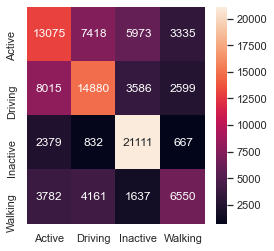

In [119]:
fig, ax = plt.subplots(figsize=(4,4)) 
sns.heatmap(cf,annot=True,fmt='g',ax=ax,xticklabels=['Active','Driving','Inactive','Walking'],yticklabels=['Active','Driving','Inactive','Walking'])

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, rf_model_preds, target_names=['Active','Driving','Inactive','Walking']))

In [ ]:
from collections import Counter
Counter(y_test)


In [ ]:
Counter(rf_model_preds)